In [1]:
import os # lets you interact with the operating system
import tkinter as tk #loads the Tkinter GUI
from tkinter import filedialog # lets you open a standard file dialog (like the one that pops up to pick a file) inside your Tkinter GUI.
import pandas as pd #imports pandas which allows you to read the CSV etc
import geopandas as gpd #imports geopandas which allows you to read geo files
import folium # A Python wrapper for Leaflet.js, used to create interactive web maps (saved as HTML)
import matplotlib.pyplot as plt #Used for making static visual plots and maps
import shapely #Imports the whole Shapely library, which handles all geometric objects
from shapely.geometry import mapping # Converts Shapely geometry objects (like Point, Polygon) into a dictionary format 
from shapely.geometry import Point, Polygon, LineString
from shapely.geometry import MultiPolygon #This is used when a feature (like a country) has multiple disconnected polygons
import webbrowser #Lets you open URLs in the default browser
import earthaccess #A NASA tool to search and download Earth data
from shapely.geometry.polygon import orient #This function ensures a polygon's vertices follow a consistent winding order (clockwise or counter-clockwise), required for correct processing or display.
import rasterio # main library for reading datasets such as.tif
from rasterio.plot import show #used to display and plot datasets


In [2]:
#os.environ["GDAL_DATA"] = r"C:\Users\marti\.conda\envs\Spatial_cluster\Library\share\gdal"
#os.environ["PROJ_LIB"] = r"C:\Users\marti\.conda\envs\Spatial_cluster\Library\share\proj"


In [3]:
# load the csv file use a dialog box (from TKinter user guide) latin 1 is useful if there are special charachters in the file. Note: You could also try 'utf-8' 
root = tk.Tk()
root.withdraw()
file = filedialog.askopenfilename()
df = pd.read_csv(file, encoding='latin1')

In [4]:
# load the csv into a dataframe df
# Show the first 10 rows of the csv dataset  - to let you understand what is in it if there are any unusal symbols etc
print("First 10 rows of the data:")
print(df.head(10))

#seperator to make the output clearer, puts in a new line before and after.
print("\n-----------------------------\n")

# Count how many rows are in the data, this will let you know what happens when it is cleaned with the dataframe df
row_count = len(df)
print("Total number of rows:", row_count)

# Count how many columns are in the df so that you can understand the size and shape of the csv dataset
col_count = len(df.columns)
print("Total number of columns:", col_count)

#check for missing values per column
print("\nMissing values per column:")
print(df.isnull().sum())


First 10 rows of the data:
     ï»¿eventid  iyear  imonth  iday approxdate  extended  resolution  \
0  1.970010e+11   1970       1     0        NaN         0         NaN   
1  1.970030e+11   1970       3    31        NaN         1  03/04/1970   
2  1.971110e+11   1971      11    20        NaN         0         NaN   
3  1.973040e+11   1973       4    25        NaN         0         NaN   
4  1.973080e+11   1973       8    29        NaN         0         NaN   
5  1.974070e+11   1974       7    15        NaN         0         NaN   
6  1.974080e+11   1974       8    15        NaN         0         NaN   
7  1.974110e+11   1974      11    14        NaN         0         NaN   
8  1.974110e+11   1974      11    22        NaN         0         NaN   
9  1.975020e+11   1975       2    28        NaN         0         NaN   

   country  country_txt  region region_txt provstate      city   latitude  \
0      101        Japan       4  East Asia   Fukouka   Fukouka  33.580412   
1      101     

In [5]:
# check and to reduce the three date colums into one to limit the impact processing.  
if 'iyear' in df and 'imonth' in df and 'iday' in df:
    #combine the year, month and day into a single column
    df['date'] = pd.to_datetime(
        #the error coerce means that it will set not a time NaT rather than cause an error if the value is invalid
        dict(year=df['iyear'], month=df['imonth'], day=df['iday']), errors='coerce')

In [6]:
# Show the first 10 rows to check the date has been combined in the data frame
print(df.head(10))

     ï»¿eventid  iyear  imonth  iday approxdate  extended  resolution  \
0  1.970010e+11   1970       1     0        NaN         0         NaN   
1  1.970030e+11   1970       3    31        NaN         1  03/04/1970   
2  1.971110e+11   1971      11    20        NaN         0         NaN   
3  1.973040e+11   1973       4    25        NaN         0         NaN   
4  1.973080e+11   1973       8    29        NaN         0         NaN   
5  1.974070e+11   1974       7    15        NaN         0         NaN   
6  1.974080e+11   1974       8    15        NaN         0         NaN   
7  1.974110e+11   1974      11    14        NaN         0         NaN   
8  1.974110e+11   1974      11    22        NaN         0         NaN   
9  1.975020e+11   1975       2    28        NaN         0         NaN   

   country  country_txt  region region_txt provstate      city   latitude  \
0      101        Japan       4  East Asia   Fukouka   Fukouka  33.580412   
1      101        Japan       4  East Asia

In [7]:
# Count the total number of rows to show how many incidents there are
print("\nTotal number of rows:", len(df))


Total number of rows: 847


In [8]:
# Count how many columns are in the csv dataset
col_count = len(df.columns)
print("Total number of columns:", col_count)

Total number of columns: 20


In [9]:
# Keep only the columns that are needed for the project in a list[]
columns_to_keep = ['region_txt', 'country_txt','city',  'date', 'latitude', 'longitude', 'summary']
#df = df[columns_to_keep] this tells Pandas to only keep these columns
df = df[columns_to_keep]



In [10]:
# Count how many columns are in the csv dataset after the columns to keep has been applied
col_count = len(df.columns)
print("Total number of columns:", col_count)

# Show the first 10 rows to check the columns have been removed from the data frame
print(df.head(10))

Total number of columns: 7
  region_txt  country_txt      city       date   latitude   longitude summary
0  East Asia        Japan   Fukouka        NaT  33.580412  130.396361     NaN
1  East Asia        Japan   Fukouka 1970-03-31  33.580412  130.396361     NaN
2  East Asia       Taiwan   Unknown 1971-11-20  23.583333  119.583330     NaN
3  East Asia        Japan  Yokosuka 1973-04-25  35.281341  139.672200     NaN
4  East Asia        Japan     Tokyo 1973-08-29  35.689125  139.747742     NaN
5  East Asia        Japan     Itami 1974-07-15  34.784306  135.400947     NaN
6  East Asia  South Korea     Seoul 1974-08-15  37.566535  126.977969     NaN
7  East Asia        Japan     Tokyo 1974-11-14  35.689125  139.747742     NaN
8  East Asia        Japan   Fukouka 1974-11-22  33.580412  130.396361     NaN
9  East Asia        Japan     Tokyo 1975-02-28  35.689125  139.747742     NaN


In [11]:
# Remove rows with missing latitude or longitude - as points need to be plotted
#if 'latitude' in df and 'longitude' in df:
before = len(df)
df = df.dropna(subset=['latitude', 'longitude'])
after = len(df)
print(f"Removed {before - after} rows with missing coordinates.")


Removed 8 rows with missing coordinates.


In [12]:
# Count the total number of rows to show how many incidents there are
print("\nTotal number of rows:", len(df))


Total number of rows: 839


In [13]:
# lowercase text for all the columns to make handelling text easier if needed
for col in df.columns:
    if df[col].dtype == object:
        df[col] = df[col].str.lower().str.strip()

In [14]:
# Count the total number of rows do see how many duplicate records there were
print("\nTotal number of rows:", len(df))

# drop duplicates
df.drop_duplicates(inplace=True)


Total number of rows: 839


In [15]:
# Show a few rows to check if text is lowercased
print(df.head(5))  # Shows first 5 rows

  region_txt country_txt      city       date   latitude   longitude summary
0  east asia       japan   fukouka        NaT  33.580412  130.396361     NaN
1  east asia       japan   fukouka 1970-03-31  33.580412  130.396361     NaN
2  east asia      taiwan   unknown 1971-11-20  23.583333  119.583330     NaN
3  east asia       japan  yokosuka 1973-04-25  35.281341  139.672200     NaN
4  east asia       japan     tokyo 1973-08-29  35.689125  139.747742     NaN


In [20]:
# Check CRS to ensure that the correct projection is being used in the mapping and set to
print(gdf.crs)

# If not EPSG:4326, reproject it:
if gdf.crs != 'EPSG:4326':
    gdf = gdf.to_crs(epsg=4326)


EPSG:4326


In [21]:
# open file to get the shapefile of the Hong Kong area - shapefile made by martin humphrey as part of the assigment
root = tk.Tk()
root.withdraw()

file_path = filedialog.askopenfilename(
    title="select your shapefile",
    filetypes=[("Shapefiles", "*.shp")]
)

# load the selected shapefile of the countries. This uses geopandas, and encodes into latin1, could use UTF8
gdf = gpd.read_file(file_path, encoding='latin1')

# use the existing df_attacks (assumed already loaded and cleaned)
# create a folium map and center it based on the shapefile
bounds = gdf.total_bounds  # [minx, miny, maxx, maxy]
center_lat = (bounds[1] + bounds[3]) / 2
center_lon = (bounds[0] + bounds[2]) / 2

# make the map using folium
m = folium.Map(location=[center_lat, center_lon], zoom_start=3)

# add shapefile features
for idx, row in gdf.iterrows():
    geom = row['geometry']
    
    if isinstance(geom, Point):
        folium.CircleMarker(
            location=[geom.y, geom.x],
            radius=3,
            color='blue',
            fill=True,
            fill_opacity=0.6,
            popup=f"point - {row.get('city', 'unknown')}"
        ).add_to(m)
        
    elif isinstance(geom, Polygon):
        folium.Polygon(
            locations=[(coord[1], coord[0]) for coord in geom.exterior.coords],
            color='green',
            fill=True,
            fill_opacity=0.4,
            popup="polygon area"
        ).add_to(m)
        
    elif isinstance(geom, MultiPolygon):
        for poly in geom:
            folium.Polygon(
                locations=[(coord[1], coord[0]) for coord in poly.exterior.coords],
                color='purple',
                fill=True,
                fill_opacity=0.4,
                popup="multipolygon area"
            ).add_to(m)

# add attack locations on the same map
for idx, row in df.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=1,
        color='yellow',
        fill=True,
        fill_opacity=0.7,
        popup=folium.Popup(
            f"city: {row.get('city', 'unknown')}<br>"
            f"country: {row.get('country', 'unknown')}<br>"
            f"date: {row.get('date', 'unknown')}",
            max_width=300
        )
    ).add_to(m)

# save the combined map
output_map = "generated_map.html"
m.save(output_map)

# open the html map automatically
webbrowser.open(output_map)

True

In [22]:
#overview of all the variables within the memory
%whos


Variable          Type             Data/Info
--------------------------------------------
LineString        type             <class 'shapely.geometry.linestring.LineString'>
MultiPolygon      type             <class 'shapely.geometry.<...>ltipolygon.MultiPolygon'>
NamespaceMagics   MetaHasTraits    <class 'IPython.core.magi<...>mespace.NamespaceMagics'>
Point             type             <class 'shapely.geometry.point.Point'>
Polygon           type             <class 'shapely.geometry.polygon.Polygon'>
after             int              839
before            int              847
bounds            ndarray          4: 4 elems, type `float64`, 32 bytes
center_lat        float64          21.80419344175928
center_lon        float64          110.50732488194376
col               str              summary
col_count         int              7
columns_to_keep   list             n=7
df                DataFrame            region_txt country_tx<...>n\n[694 rows x 7 columns]
earthaccess       module 

In [23]:
# open file to get the shapefile of the countries
root = tk.Tk()
root.withdraw()

file_path = filedialog.askopenfilename(
    title="select your shapefile",
    filetypes=[("Shapefiles", "*.shp")]
)

if file_path:
    # read the shapefile into a GeoDataFrame
    countries = gpd.read_file(file_path).to_crs(epsg=4326)

    # get the union of all geometries
    outline = countries.geometry.union_all()

    # wrap it in a GeoDataFrame so Jupyter will plot it
    outline_gdf = gpd.GeoDataFrame(geometry=[outline], crs="EPSG:4326")

    # display the outline
    outline_gdf.explore()  # if you want interactive (needs folium)
    # or:
    # outline_gdf.plot()    # for static plot
else:
    print("No file selected.")



In [24]:
outline.bounds # get the min x, min y, max x, max y values of the polygon

(74.1572055810097, -9.51660313206516, 146.8574441828778, 53.12499001558372)

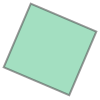

In [25]:
# gets the minimum rotated rectangle that covers the outline. Shapely geometry property that calculates the smallest rectangle (by area) 
# that can fully contain the polygon, but unlike a bounding box, it’s allowed to rotate.
search_area = outline.minimum_rotated_rectangle

search_area # in a jupyter notebook, this displays the polygon

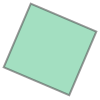

In [26]:
search_area = shapely.geometry.polygon.orient(search_area, sign=1) # a sign of 1 means oriented counter-clockwise this is important

search_area # this doesn't actually change the geometry, just the order of the vertices

In [27]:
#login to get the earthaccess data
earthaccess.login(strategy='.netrc')

In [28]:
#seach for the dataset that you want that cover the area 
datasets = earthaccess.search_datasets(
    keyword='elevation', # search for datasets that match the keyword 'elevation'
    polygon=search_area.exterior.coords # search for datasets that intersect Hong Kong and Macau
)

if datasets:
    print(f"Found {len(datasets)} dataset(s) related to elevation.")
    for ds in datasets[:10]:  # Show first 10 dataset names
        print("→", ds["umm"]["EntryTitle"])
else:
    print("No datasets found in the selected area.")

Found 634 dataset(s) related to elevation.
→ GLAS/ICESat L1B Global Elevation Data (HDF5) V034
→ GLAS/ICESat L1B Global Elevation Data (HDF5) V034
→ ASTER Global Digital Elevation Model V003
→ GEDI L2A Elevation and Height Metrics Data Global Footprint Level V002
→ CryoSat-2 Level-1B Waveforms, Sea Ice Elevation, and Surface Roughness V001
→ ASTER Global Digital Elevation Model NetCDF V003
→ CryoSat-2 Level-4 Sea Ice Elevation, Freeboard, and Thickness V001
→ ASTER Digital Elevation Model V003
→ ASTER Orthorectified Digital Elevation Model (DEM) V003
→ IceBridge ATM L2 Icessn Elevation, Slope, and Roughness V002


In [29]:
dataset = datasets[2] # get the first 2 results
#Get key metadata fields from the dataset
entry_title = dataset.get_umm('EntryTitle')         # Full name of the dataset
short_name = dataset.get_umm('ShortName')           #  dataset code
abstract = dataset.get_umm('Abstract')              # A description of what the dataset is about

# Print them out
print("Dataset Entry Title:")
print(entry_title)
print("\nShort Name:")
print(short_name)
print("\nAbstract:")
print(abstract)

Dataset Entry Title:
ASTER Global Digital Elevation Model V003

Short Name:
ASTGTM

Abstract:
The ASTER Global Digital Elevation Model (GDEM) Version 3 (ASTGTM) provides a global digital elevation model (DEM) of land areas on Earth at a spatial resolution of 1 arc second (approximately 30 meter horizontal posting at the equator).

The development of the ASTER GDEM data products is a collaborative effort between National Aeronautics and Space Administration (NASA) and Japan’s Ministry of Economy, Trade, and Industry (METI). The ASTER GDEM data products are created by the Sensor Information Laboratory Corporation (SILC) in Tokyo. 

The ASTER GDEM Version 3 data product was created from the automated processing of the entire ASTER Level 1A (https://doi.org/10.5067/ASTER/AST_L1A.003) archive of scenes acquired between March 1, 2000, and November 30, 2013. Stereo correlation was used to produce over one million individual scene based ASTER DEMs, to which cloud masking was applied. All cloud

In [31]:
results = earthaccess.search_data(
    short_name="ASTGTM",  # search for ASTER GDEM v3 granules
    polygon=search_area.exterior.coords,  # search for images that intersect our search_area
    count=10  # only show the first 10 results
)




In [ ]:
len(results) # show the length of the results list

In [ ]:
results = earthaccess.search_data(
    short_name='ASTGTM', # search for ASTER GDEM v3 granules
    polygon=search_area.exterior.coords, # search for images that intersect our search_area
    count=10 # only show the first 10 results
)

# Print a summary for each granule
for i, granule in enumerate(results, start=1):
    granule_ur = granule.get_umm('GranuleUR')  # unique granule identifier
    temporal = granule.get_umm('TemporalExtent') or {}
    start_time = temporal.get('BeginningDateTime', 'Unknown')
    end_time = temporal.get('EndingDateTime', 'Unknown')
    links = granule.data_links()
    download_url = links[0] if links else 'No download URL available'

    print(f"\n🔹 Granule {i}")
    print(f"Granule ID: {granule_ur}")
    print(f"Time Range: {start_time} to {end_time}")
    print(f"Download URL: {download_url}")

In [ ]:
earthaccess.login(strategy='.netrc')
granule = next(iter(results)) # get the "first" item from the list
granule # show the first item

In [ ]:
#earthaccess.login(strategy='.netrc')
downloaded_files = earthaccess.download(results, 'ASTGTM') # download each of the granules to the aster_gdem directory

In [ ]:
print(f"Total files downloaded: {len(downloaded_files)}")


In [ ]:
# download the files 
downloaded_files = earthaccess.download(results, "./ASTGTM")

# print the list of file paths
for file in downloaded_files:
    print(file)


In [ ]:
#below this add the code for loading and exploiting the imagery 

In [ ]:
# Start by hiding the default Tkinter window 
root = tk.Tk()
root.withdraw()

# Open a file dialog to load the GEOTif file
file_path = filedialog.askopenfilename(
    title="Select a GeoTIFF file",
    filetypes=[("TIFF files", "*.tif *.tiff")]
)

# If you dont pick a file, stop here
if not file_path:
    print("No file selected.")
else:
    try:
        # Open the .tif file using rasterio (reads geospatial raster data)
        with rasterio.open(file_path) as dataset:
            print(f"{dataset.name} opened in {dataset.mode} mode")
            
            # Check how many bands are in the image
            print(f"Image has {dataset.count} band(s)")
            
            # Get the image size in pixels to understand the image
            print(f"Image size (width, height): {dataset.width} x {dataset.height}")
            
            # Check what kind of data the first band uses (e.g., uint8, float32)
            print(f"Band 1 data type is {dataset.dtypes[0]}")
            
            # Print coordinate system (tells us how the image lines up with real-world locations)
            print(f"CRS: {dataset.crs}")
            
            # Print the bounding box of the image in map coordinates
            print(f"Bounds: {dataset.bounds}")

            # Load the first band and plot it as a grayscale image
            band1 = dataset.read(1)

            plt.imshow(band1, cmap='gray')
            plt.title("Band 1 - Grayscale View")
            plt.colorbar(label='Pixel Values')
            plt.show()

    except Exception as e:
        # Catch any errors (e.g., if the file isn’t a proper raster)
        print(f"Error opening file: {e}")

In [ ]:
# Acknowledgement of AI and Source Material Use
#
# This code was developed as part of coursework for the University of Ulster.
# It draws upon methods and concepts introduced during lectures and practical sessions.
#
# Prior to this module, I had no prior experience with coding.
# I used AI assistance (specifically OpenAI’s ChatGPT) to help understand,
# structure, and refine parts of the code and explanations.
#
# While I do not claim full authorship of all content, I have engaged critically with the outputs,
# made appropriate modifications, and ensured I understand the code and techniques used.
#
# The AI was used as a learning aid to support my progress and enhance my understanding of geospatial coding,
# allowing me to achieve more than would otherwise have been possible.
# This use is consistent with the spirit of academic integrity and the policies of the University of Ulster.

